In [49]:
%pylab inline
from __future__ import division
import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display

img_height=128
img_width=416
#ckpt_file = 'models/model-190532'
ckpt_file = "experiments/experiment2-e100_s0.5/model.latest"
fh = open('misc/0.png', 'rb')
fh1 = open('misc/1.png', 'rb')
fh2 = open('misc/2.png', 'rb')
fh3 = open('misc/3.png', 'rb')
fh4 = open('misc/4.png', 'rb')
fh5 = open('misc/5.png', 'rb')
fh6 = open('misc/6.png', 'rb')
fh7 = open('misc/7.png', 'rb')
fh8 = open('misc/8.png', 'rb')
I = pil.open(fh)
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)
I1 = pil.open(fh1)
I1 = I1.resize((img_width, img_height), pil.ANTIALIAS)
I1 = np.array(I1)
I2 = pil.open(fh2)
I2 = I2.resize((img_width, img_height), pil.ANTIALIAS)
I2 = np.array(I2)
I3 = pil.open(fh3)
I3 = I3.resize((img_width, img_height), pil.ANTIALIAS)
I3 = np.array(I3)
I4 = pil.open(fh4)
I4 = I4.resize((img_width, img_height), pil.ANTIALIAS)
I4 = np.array(I4)
I5 = pil.open(fh5)
I5 = I5.resize((img_width, img_height), pil.ANTIALIAS)
I5 = np.array(I5)
I6 = pil.open(fh6)
I6 = I6.resize((img_width, img_height), pil.ANTIALIAS)
I6 = np.array(I6)
I7 = pil.open(fh7)
I7 = I7.resize((img_width, img_height), pil.ANTIALIAS)
I7 = np.array(I7)
I8 = pil.open(fh8)
I8 = I8.resize((img_width, img_height), pil.ANTIALIAS)
I8 = np.array(I8)

Populating the interactive namespace from numpy and matplotlib


In [43]:
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')

In [50]:
saver = tf.train.Saver([var for var in tf.model_variables()]) 
with tf.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')
    pred1 = sfm.inference(I1[None,:,:,:], sess, mode='depth')
    pred2 = sfm.inference(I2[None,:,:,:], sess, mode='depth')
    pred3 = sfm.inference(I3[None,:,:,:], sess, mode='depth')
    pred4 = sfm.inference(I4[None,:,:,:], sess, mode='depth')
    pred5 = sfm.inference(I5[None,:,:,:], sess, mode='depth')
    pred6 = sfm.inference(I6[None,:,:,:], sess, mode='depth')
    pred7 = sfm.inference(I7[None,:,:,:], sess, mode='depth')
    pred8 = sfm.inference(I8[None,:,:,:], sess, mode='depth')

INFO:tensorflow:Restoring parameters from experiments/experiment2-e100_s0.5/model.latest


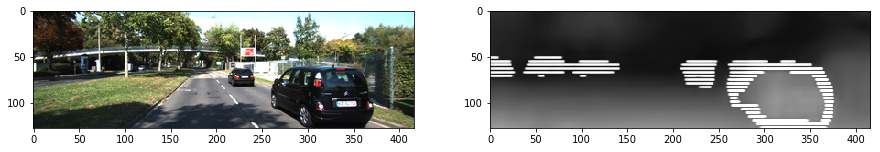

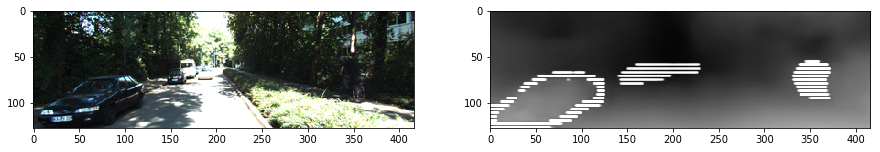

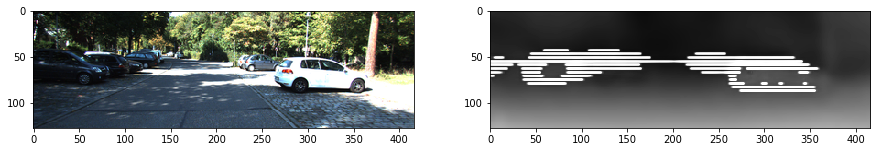

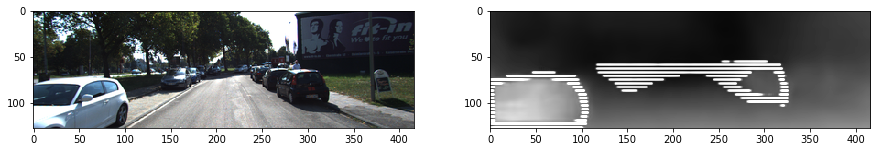

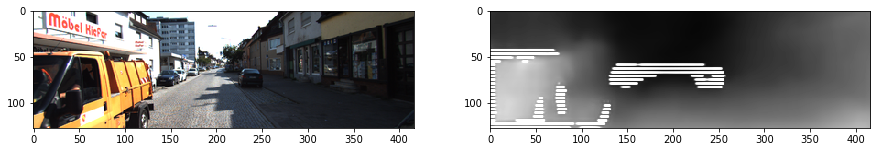

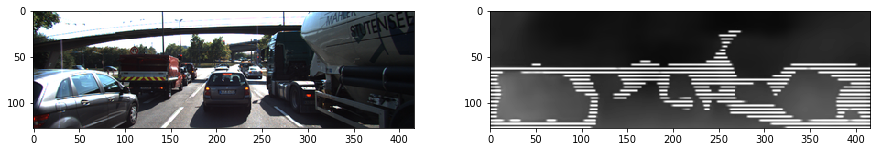

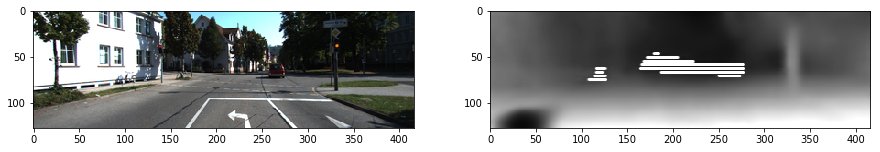

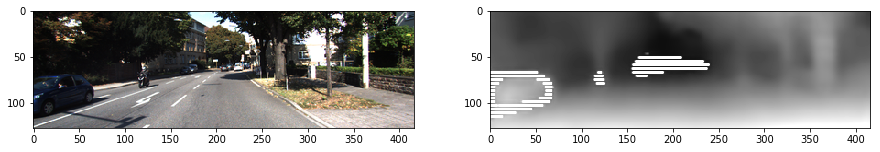

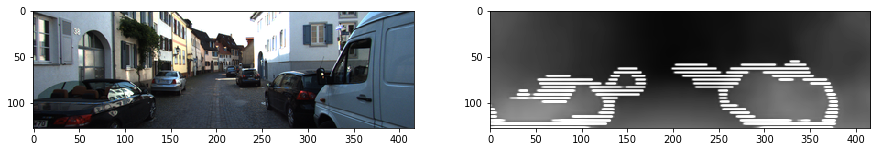

In [51]:
figure(figsize=(15,15))
subplot(1,2,1); imshow(I)
subplot(1,2,2); imshow(normalize_depth_for_display(pred['depth'][0,:,:,0]))
plt.show()

figure(figsize=(15,15))
subplot(1,2,1); imshow(I1)
subplot(1,2,2); imshow(normalize_depth_for_display(pred1['depth'][0,:,:,0]))
plt.show()

figure(figsize=(15,15))
subplot(1,2,1); imshow(I2)
subplot(1,2,2); imshow(normalize_depth_for_display(pred2['depth'][0,:,:,0]))
plt.show()

figure(figsize=(15,15))
subplot(1,2,1); imshow(I3)
subplot(1,2,2); imshow(normalize_depth_for_display(pred3['depth'][0,:,:,0]))
plt.show()

figure(figsize=(15,15))
subplot(1,2,1); imshow(I4)
subplot(1,2,2); imshow(normalize_depth_for_display(pred4['depth'][0,:,:,0]))
plt.show()

figure(figsize=(15,15))
subplot(1,2,1); imshow(I5)
subplot(1,2,2); imshow(normalize_depth_for_display(pred5['depth'][0,:,:,0]))
plt.show()

figure(figsize=(15,15))
subplot(1,2,1); imshow(I6)
subplot(1,2,2); imshow(normalize_depth_for_display(pred6['depth'][0,:,:,0]))
plt.show()

figure(figsize=(15,15))
subplot(1,2,1); imshow(I7)
subplot(1,2,2); imshow(normalize_depth_for_display(pred7['depth'][0,:,:,0]))
plt.show()

figure(figsize=(15,15))
subplot(1,2,1); imshow(I8)
subplot(1,2,2); imshow(normalize_depth_for_display(pred8['depth'][0,:,:,0]))
plt.show()

(64, 208)
mean of non zero component of gt: 0.306541


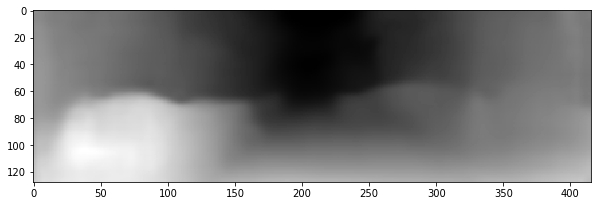

GT loss: 0.0


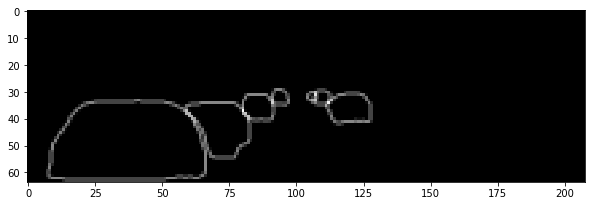

good loss: 2.07955


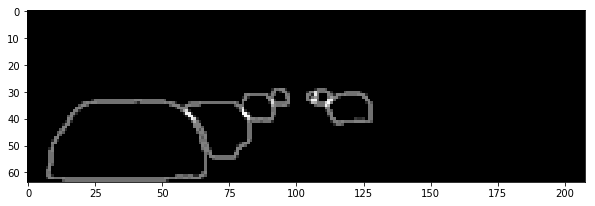

im loss: 74.8427


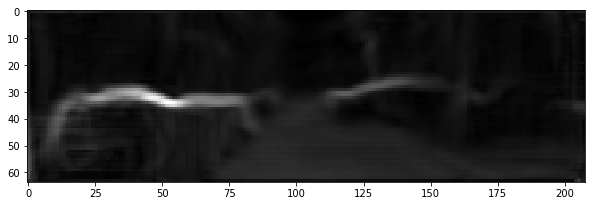

half_im loss: 29.1996


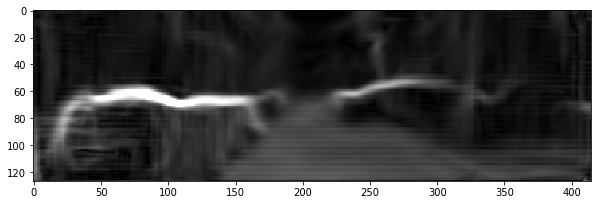

norm_im loss: 0.404338


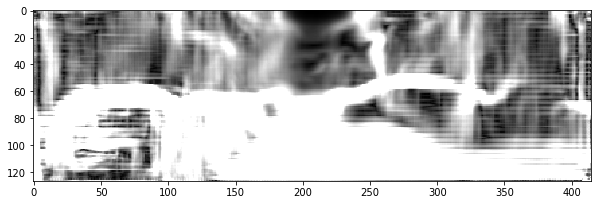

In [5]:
from scipy.signal import convolve2d
import skimage.measure

gt = plt.imread("GT.png")
good = plt.imread("good.png")


print(gt.shape)

print("mean of non zero component of gt:", np.mean(gt[gt>0]))

# loss function (penalizes only when gradient not strong enough)
loss = lambda mp: np.sum(gt*np.maximum(0, gt - mp))

# depth map
depth = pred['depth'][0,:,:,0]

# disparity
d = 1. / (depth + 1e-6)
plt.figure(figsize=(10,5))
imshow(d, cmap="gray")
plt.show()

# gradient map
him = d[1:,1:] - d[1:,:-1]
vim = d[1:,1:] - d[:-1,1:]
im = (him*him + vim*vim)**0.5

# divide by half max
half_im = im / np.max(im) * 2.0
clip_half_im = np.clip(half_im, 0, 1) # clipping for disply

# normalize
norm_im = im / np.std(im)
clip_norm_im = np.clip(norm_im, 0, 1) # clipping for disply

# pooling by 2x2 kernel
im = skimage.measure.block_reduce(im, (2,2), np.max)
norm_im = skimage.measure.block_reduce(norm_im, (2,2), np.max)
half_im = skimage.measure.block_reduce(half_im, (2,2), np.max)

# display
print("GT loss:", loss(gt))
plt.figure(figsize=(10,5))
imshow(gt, cmap="gray")
plt.show()
print("good loss:", loss(good))
plt.figure(figsize=(10,5))
imshow(good, cmap="gray")
plt.show()
print("im loss:", loss(im))
plt.figure(figsize=(10,5))
imshow(im, cmap="gray")
plt.show()
print("half_im loss:", loss(half_im))
plt.figure(figsize=(10,5))
imshow(clip_half_im, cmap="gray")
plt.show()
print("norm_im loss:", loss(norm_im))
plt.figure(figsize=(10,5))
imshow(clip_norm_im, cmap="gray")
plt.show()

In [2]:
gt = np.load('gt.npy', encoding='latin1')

/home/physiconomic/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


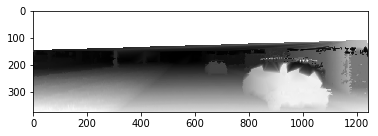

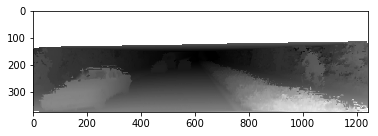

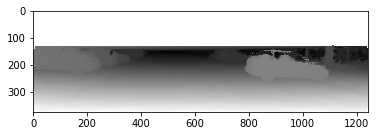

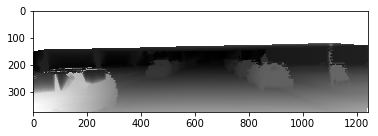

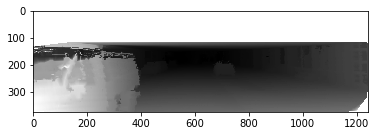

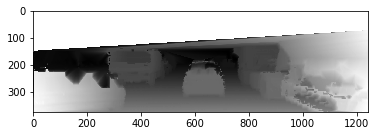

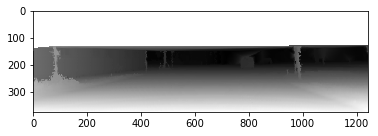

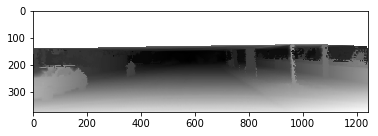

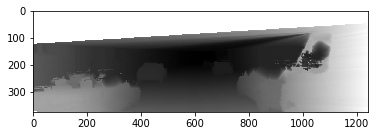

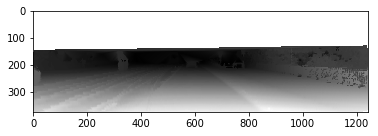

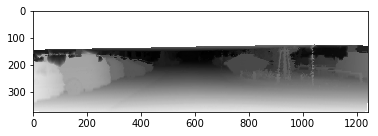

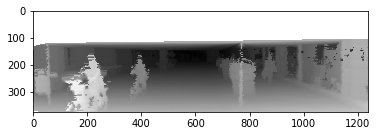

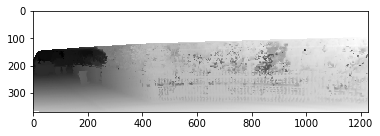

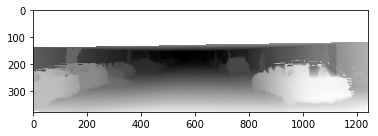

In [40]:
lst = [70, 80, 100, 190, 230, 260, 300, 350, 400, 470, 500, 550, 600, 650]
for i in lst:
    d = gt[i]
    d = (d > 0)/d
    imshow(d, cmap="gray")
    plt.show()

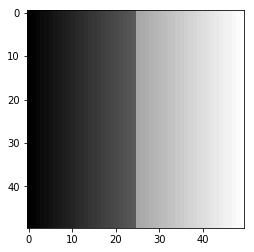

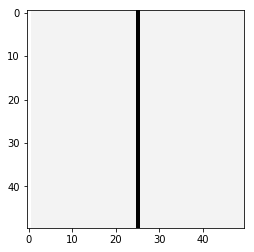

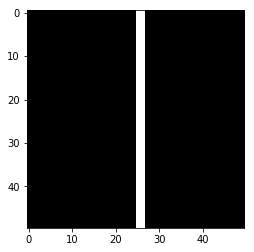

In [6]:
# RANDOM GARBAGE

# im = convolve2d(im, [[-1.], [1.]], mode="same")
# im *= im *20000
# print(np.max(im))
# print(np.min(im))
# print(np.std(im))
# im = np.clip(im, 0, 1)

x = np.ones((50, 50))
x *= np.linspace(0, 0.5)
x[:,25:] += 0.2
imshow(x, cmap="gray")
plt.show()
im = convolve2d(x, [[-1, 1]], mode="same")
imshow(im, cmap="gray")
plt.show()
im = convolve2d(im, [[-1, 1]], mode="same")
imshow(im*im, cmap="gray")
plt.show()